
# PACKAGES USED
---



In [0]:
import pandas as pd
import numpy as np
import seaborn as sbn
import nltk
import re
import matplotlib.pyplot as plt
import datetime
!pip install mglearn
import mglearn
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from sklearn.metrics import classification_report
from google.colab import drive
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from nltk.stem.snowball import SnowballStemmer


     |████████████████████████████████| 542kB 2.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=6979da66cc3db529b3fabc7760ecf0ad18c3655d6e75e883d3fa26826fcbd4bb
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# DATA UPLOAD

In [0]:
#train = pd.read_csv('train.csv')

In [0]:
#test = pd.read_csv('test.csv')

If running on colab run the below code

In [0]:
train = pd.read_csv('/content/drive/My Drive/MSC SEM 2 - 2020/F21AA_Applied Text Analytics/CW 1 010320/train.csv')

In [0]:
test = pd.read_csv('/content/drive/My Drive/MSC SEM 2 - 2020/F21AA_Applied Text Analytics/CW 1 010320/test.csv')

In [0]:
test_labels = pd.read_csv('/content/drive/My Drive/MSC SEM 2 - 2020/F21AA_Applied Text Analytics/CW 1 010320/labels.csv')

# DATA EXPLORATION AND VISULIZATION

In [0]:
print(train.shape)
print(test.shape)

(426340, 10)
(142114, 9)


In [0]:
# return the dtype of each column 
result = train.dtypes
print(result)

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object


In [0]:
#replacing null feilds in Summary with blank
train.Summary.fillna('', inplace=True)
test.Summary.fillna('',inplace=True)
#replacing null profile name with NA
train.ProfileName.fillna('NA', inplace=True)
test.ProfileName.fillna('NA', inplace=True)

In [0]:
#checking for missing data in train
total_train = train.isnull().sum().sort_values(ascending=False)
percent_train = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data_train = pd.concat([total_train, percent_train], axis=1, keys=['Total', 'Percent'])
missing_data_train.head(20)

,Total,Percent
Text,0,0.0
Summary,0,0.0
Time,0,0.0
Score,0,0.0
HelpfulnessDenominator,0,0.0
HelpfulnessNumerator,0,0.0
ProfileName,0,0.0
UserId,0,0.0
ProductId,0,0.0
Id,0,0.0


In [0]:
#checking for missing data in test
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(20)

,Total,Percent
Text,0,0.0
Summary,0,0.0
Time,0,0.0
HelpfulnessDenominator,0,0.0
HelpfulnessNumerator,0,0.0
ProfileName,0,0.0
UserId,0,0.0
ProductId,0,0.0
Id,0,0.0


In [0]:
#Concating the Summary and Text Feilds together into summary_text
train['summary_text'] = train['Summary'] + ' ' + train['Text']
test['summary_text'] = test['Summary'] + ' ' + test['Text']

In [0]:
train.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'summary_text'],
      dtype='object')

In [0]:
test.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Time', 'Summary', 'Text', 'summary_text'],
      dtype='object')

In [0]:
#del train['summary_text_pp']

In [0]:
#to record the lenght of the review 
train['review_len'] = train['summary_text'].astype(str).apply(len)

#to record the word count of the review
train['word_count'] = train['summary_text'].apply(lambda x: len(str(x).split()))

In [0]:
train['review_len'].describe()

count    426340.000000
mean        459.840942
std         448.414649
min          23.000000
25%         200.000000
50%         325.000000
75%         554.000000
max       21535.000000
Name: review_len, dtype: float64

In [0]:
train['word_count'].describe()

count    426340.000000
mean         84.232096
std          79.927476
min           4.000000
25%          37.000000
50%          60.000000
75%         102.000000
max        3451.000000
Name: word_count, dtype: float64

# TEXT PROCESSING AND NORMALIZATION

In [0]:
train.loc[400,'summary_text']

'WOW!!!!!!!!!!! these plant are easy to grow coming from someone w/no green thumb, lol. highly reccomend<a href="http://www.amazon.com/gp/product/B003U2MDGO">3 Baby Staghorn Fern Plants</a>'

In [0]:
#function to replace all HTML markers from the summary_text
def preprocess_htmltags(summary_text_pp):
    summary_text_pp = summary_text_pp.str.replace('<br />', "")
    summary_text_pp = summary_text_pp.str.replace('<a.*>.*</a>', '')
    summary_text_pp = summary_text_pp.str.replace('&amp', '')
    summary_text_pp = summary_text_pp.str.replace('&gt', '')
    summary_text_pp = summary_text_pp.str.replace('&lt', '')
    summary_text_pp = summary_text_pp.str.replace('\xa0', '')
    summary_text_pp = summary_text_pp.str.replace(r'\"', '').replace(r"\'", '')
    return summary_text_pp

In [0]:
train['summary_text_pp'] = preprocess_htmltags(train['summary_text'])

In [0]:
test['summary_text_pp'] = preprocess_htmltags(test['summary_text'])

In [0]:
train.loc[400,'summary_text_pp']  

'WOW!!!!!!!!!!! these plant are easy to grow coming from someone w/no green thumb, lol. highly reccomend'

In [0]:
#to convert to lower case
train['summary_text_pp_lc'] = train['summary_text_pp'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [0]:
test['summary_text_pp_lc'] = test['summary_text_pp'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [0]:
train.loc[400,'summary_text_pp_lc']

'wow!!!!!!!!!!! these plant are easy to grow coming from someone w/no green thumb, lol. highly reccomend'

In [0]:
#to remove punctuations
#train['summary_text_pp'] = train['summary_text_pp'].str.replace('[^\w\s]','')
#train['summary_text_pp'].head()

In [0]:
#count of numerics
train['numerics'] = train['summary_text_pp'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['summary_text_pp','numerics']].tail()

,summary_text_pp,numerics
426335,"i like it Like a lot of the gums by Lotte, the...",0
426336,The Anti-Fatigue This is a fantastic product. ...,5
426337,Always the right formula I trust this brand--t...,0
426338,Smoked Black Pepper This pepper is great! I wa...,0
426339,Canidae Dog Food made my dogs extremely ill I ...,2


In [0]:
train['numerics'].describe()

count    426340.00000
mean          0.44047
std           1.06398
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max          32.00000
Name: numerics, dtype: float64

In [0]:
#count of stopwords 
stop_words = stopwords.words('english')
print(stop_words)
stop_words.remove('no')
stop_words.remove('not')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [0]:
train['count_of_stopwords'] = train['summary_text_pp'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
train[['summary_text_pp','count_of_stopwords']].head()

,summary_text_pp,count_of_stopwords
0,Very Good I received this product early from t...,17
1,"Organic, Kosher, Tasty Assortment of Premium T...",94
2,"excellent gluten-free spaghetti: great taste, ...",84
3,Lindt is Lindt Buying this multi-pack I was mi...,11
4,YUM!!!!! These bars are so good! I loved them ...,10


In [0]:
train['count_of_stopwords'].describe()

count    426340.000000
mean         32.051121
std          31.398492
min           0.000000
25%          13.000000
50%          23.000000
75%          40.000000
max        1275.000000
Name: count_of_stopwords, dtype: float64

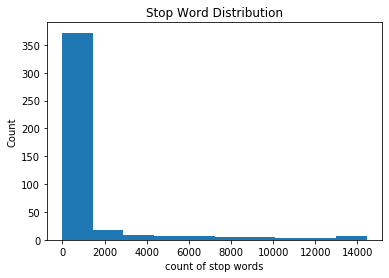

In [0]:
train['count_of_stopwords'].value_counts().plot(
    kind='hist',
    title='Stop Word Distribution')
plt.xlabel('count of stop words')
plt.ylabel('Count')
plt.show()

In [0]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [0]:
def normalize_document_Tokenize_WordPunct(review_text):
    #remove numbers,special characters\whitespaces
    review_text = str(review_text)
    review_text = re.sub(r'[^a-zA-Z\s]',' ',review_text, re.I|re.A)
    review_text = re.sub(r'[0-9]+',' ',review_text)
    review_text = review_text.strip()
    # tokenize document
    wpt = nltk.WordPunctTokenizer()
    tokens = wpt.tokenize(review_text)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    review_text = ' '.join(filtered_tokens)
    return review_text

In [0]:
def normalize_document_Tokenize_TreeBank(review_text):
    #remove numbers, special characters\whitespaces
    review_text = str(review_text)
    review_text = re.sub(r'[^a-zA-Z\s]',' ',review_text, re.I|re.A)
    review_text = re.sub(r'[0-9]+',' ',review_text)
    review_text = review_text.strip()
    # tokenize document
    wptb = nltk.TreebankWordTokenizer()
    tokens = wptb.tokenize(review_text)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    review_text = ' '.join(filtered_tokens)
    return review_text

In [0]:
def normalize_document_Tokenize_Lemmatize(review_text):
     #remove numbers, special characters\whitespaces
    review_text = str(review_text)
    review_text = re.sub(r'[^a-zA-Z\s]',' ',review_text, re.I|re.A)
    review_text = re.sub(r'[0-9]+',' ',review_text)
    review_text = review_text.strip()
    # tokenize document
    wptb = nltk.TreebankWordTokenizer()
    tokens = wptb.tokenize(review_text)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    #lemmatize docment
    lemmatizer = WordNetLemmatizer()
    # Lemmatize list of words and join
    review_text = ' '.join([lemmatizer.lemmatize(w,get_wordnet_pos(w)) for w in filtered_tokens])
    return review_text

In [0]:
def normalize_document_Tokenize_Stem(review_text):
    #remove numbers, special characters\whitespaces
    review_text = str(review_text)
    review_text = re.sub(r'[^a-zA-Z\s]',' ',review_text, re.I|re.A)
    review_text = re.sub(r'[0-9]+',' ',review_text)
    review_text = review_text.strip()
    # tokenize document
    wptb = nltk.TreebankWordTokenizer()
    tokens = wptb.tokenize(review_text)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    #stem the  docment
    stemmer=PorterStemmer()
    # stemming list of words and join
    review_text = ' '.join([stemmer.stem(w) for w in filtered_tokens])
    return review_text

In [0]:
def normalize_document_Tokenize_StemSnowball(review_text):
    #remove numbers, special characters\whitespaces
    review_text = str(review_text)
    review_text = re.sub(r'[^a-zA-Z\s]',' ',review_text, re.I|re.A)
    review_text = re.sub(r'[0-9]+',' ',review_text)
    review_text = review_text.strip()
    # tokenize document
    wptb = nltk.TreebankWordTokenizer()
    tokens = wptb.tokenize(review_text)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    #stem the  docment
    stemmer=SnowballStemmer("english")
    # stemming list of words and join
    review_text = ' '.join([stemmer.stem(w) for w in filtered_tokens])
    return review_text

In [0]:
train['summary_text_pp_lc_nm']=train['summary_text_pp_lc'].apply(normalize_document_Tokenize_WordPunct)

In [0]:
train['summary_text_pp_lc_nm_1']=train['summary_text_pp_lc'].apply(normalize_document_Tokenize_TreeBank)

In [0]:
train['summary_text_pp_lc_nm_2']=train['summary_text_pp_lc'].apply(normalize_document_Tokenize_Lemmatize)

In [0]:
test['summary_text_pp_lc_nm_2']=test['summary_text_pp_lc'].apply(normalize_document_Tokenize_Lemmatize)

In [0]:
train['summary_text_pp_lc_nm_3']=train['summary_text_pp'].apply(normalize_document_Tokenize_Stem)

In [0]:
train['summary_text_pp_lc_nm_4']=train['summary_text_pp'].apply(normalize_document_Tokenize_StemSnowball)

In [0]:
print(train['summary_text_pp_lc_nm'].head())
print(train['summary_text_pp_lc_nm_1'].head())
print(train['summary_text_pp_lc_nm_2'].head())
print(train['summary_text_pp_lc_nm_3'].head())
print(train['summary_text_pp_lc_nm_4'].head())

0    good received product early seller tastey grea...
1    organic kosher tasty assortment premium teas t...
2    excellent gluten free spaghetti great taste gr...
3    lindt lindt buying multi pack misled picture w...
4    yum bars good loved warmed definitely think gr...
Name: summary_text_pp_lc_nm, dtype: object
0    good received product early seller tastey grea...
1    organic kosher tasty assortment premium teas t...
2    excellent gluten free spaghetti great taste gr...
3    lindt lindt buying multi pack misled picture w...
4    yum bars good loved warmed definitely think gr...
Name: summary_text_pp_lc_nm_1, dtype: object
0    good receive product early seller tastey great...
1    organic kosher tasty assortment premium tea te...
2    excellent gluten free spaghetti great taste gr...
3    lindt lindt buying multi pack mislead picture ...
4    yum bar good love warm definitely think great ...
Name: summary_text_pp_lc_nm_2, dtype: object
0    veri good I receiv product earli sell

In [0]:
train.loc[60000,'summary_text']

'Love these My kids think these are "candy bars" and we prefer to keep it that way!  They taste amazing and are good for you. Price was good and nice to have them shipped to your door in such large quantity.'

In [0]:
train.loc[60000,'summary_text_pp']

'Love these My kids think these are candy bars and we prefer to keep it that way!  They taste amazing and are good for you. Price was good and nice to have them shipped to your door in such large quantity.'

In [0]:
train.loc[60000,'summary_text_pp_lc_nm']

'love kids think candy bars prefer keep way taste amazing good price good nice shipped door large quantity'

In [0]:
train.loc[60000,'summary_text_pp_lc_nm_1']

'love kids think candy bars prefer keep way taste amazing good price good nice shipped door large quantity'

In [0]:
train.loc[60000,'summary_text_pp_lc_nm_2']

'love kid think candy bar prefer keep way taste amaze good price good nice ship door large quantity'

In [0]:
train.loc[60000,'summary_text_pp_lc_nm_3']

'love My kid think candi bar prefer keep way they tast amaz good price good nice ship door larg quantiti'

In [0]:
train.loc[60000,'summary_text_pp_lc_nm_4']

'love my kid think candi bar prefer keep way they tast amaz good price good nice ship door larg quantiti'

In [0]:
train_nm = train[['Id','Score','Text','summary_text','summary_text_pp_lc','summary_text_pp_lc_nm','summary_text_pp_lc_nm_1','summary_text_pp_lc_nm_2','summary_text_pp_lc_nm_3','summary_text_pp_lc_nm_4']].copy()

In [0]:
test_nm = test[['Id','Text','summary_text','summary_text_pp_lc','summary_text_pp_lc_nm_2']].copy()

In [0]:
train_nm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426340 entries, 0 to 426339
Data columns (total 10 columns):
Id                         426340 non-null int64
Score                      426340 non-null int64
Text                       426340 non-null object
summary_text               426340 non-null object
summary_text_pp_lc         426340 non-null object
summary_text_pp_lc_nm      426340 non-null object
summary_text_pp_lc_nm_1    426340 non-null object
summary_text_pp_lc_nm_2    426340 non-null object
summary_text_pp_lc_nm_3    426340 non-null object
summary_text_pp_lc_nm_4    426340 non-null object
dtypes: int64(2), object(8)
memory usage: 32.5+ MB


In [0]:
test_nm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142114 entries, 0 to 142113
Data columns (total 5 columns):
Id                         142114 non-null int64
Text                       142114 non-null object
summary_text               142114 non-null object
summary_text_pp_lc         142114 non-null object
summary_text_pp_lc_nm_2    142114 non-null object
dtypes: int64(1), object(4)
memory usage: 5.4+ MB


In [0]:
from google.colab import files
train_nm.to_csv('train_nm.csv') 
files.download('train_nm.csv')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 44910, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
test_nm.to_csv('test_nm.csv') 
files.download('test_nm.csv')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 41604, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

# Vector Space Model and feature Selection

# Using CountVectorizer

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
vect_cv = CountVectorizer().fit(train['summary_text_pp_lc_nm_2'])
X_train_cv = vect_cv.transform(train['summary_text_pp_lc_nm_2'])
print("X_train:\n{}".format(repr(X_train_cv)))

#256805 Features

X_train:
<426340x256805 sparse matrix of type '<class 'numpy.int64'>'
	with 14999521 stored elements in Compressed Sparse Row format>


In [0]:
feature_names_cv= vect_cv.get_feature_names()
print("Number of features :{}".format(len(feature_names_cv)))
print("First 20 Features:\n{}".format(feature_names_cv[:50]))
print("Features 50000 to 50030:\n{}".format(feature_names_cv[50000:50030]))
print("Every 5000th feature:\n{}".format(feature_names_cv[::5000]))

Number of features :256805
First 20 Features:
['__________________________________________________________________________________________________________for', '_i_', 'aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaaaaa', 'aaaaaaaaaaa', 'aaaaaaaaaaaa', 'aaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaargh', 'aaaaaaaaaaaaaaaaacccccccckkkkkkkkkk', 'aaaaaaaaaaacccckkkkk', 'aaaaaaaaagghh', 'aaaaaaah', 'aaaaaaahhhhhh', 'aaaaaaarrrrrggghhh', 'aaaaaaggggggghhhhhhhh', 'aaaaaagggghhhh', 'aaaaaagh', 'aaaaaah', 'aaaaaahhh', 'aaaaaahhhhh', 'aaaaaahhhhhyaaaaaa', 'aaaaaahhhhten', 'aaaaaawwwwwwwwww', 'aaaaah', 'aaaaahhh', 'aaaaallll', 'aaaaawsome', 'aaaah', 'aaaahhh', 'aaaahhhh', 'aaaahhhhh', 'aaaahhhhhh', 'aaaahs', 'aaaallll', 'aaaamazing', 'aaaammmmaaaaazziiiinnnnggg', 'aaaand', 'aaaannnndddgolazo', 'aaaarrrrghh', 'aaaarrrrrgggghhhhh', 'aaadont', 'aaagh', 'aaah', 'aaahhh', 'aaahhhh', 'aaahhhhhh']
Features 50000 to 50030:
['cookingcheck', 'cookingcheersdave', 'cookingcom', 'cookingdelicious', 'cookingeating', 

In [0]:
vect_cv1 = CountVectorizer(min_df=5).fit(train['summary_text_pp_lc_nm_2'])
X_train_cv1 = vect_cv1.transform(train['summary_text_pp_lc_nm_2'])
print("X_train with min_df as 5:\n{}".format(repr(X_train_cv1)))

#48451 features

X_train with min_df as 5:
<426340x48451 sparse matrix of type '<class 'numpy.int64'>'
	with 14699103 stored elements in Compressed Sparse Row format>


In [0]:
feature_names_cv1= vect_cv1.get_feature_names()
print("Number of features :{}".format(len(feature_names_cv1)))
print("First 20 Features:\n{}".format(feature_names_cv1[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names_cv1[20010:20030]))
print("Every 5000th feature:\n{}".format(feature_names_cv1[::5000]))

Number of features :48451
First 20 Features:
['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaaarrrrrggghhh', 'aaah', 'aafco', 'aafcoa', 'aafes', 'aahing', 'aai', 'aand', 'ab', 'aback', 'abandon', 'abandoned', 'abandoning', 'abates', 'abbey', 'abbott']
Features 20010 to 20030:
['holisticnaturalhealthyetcthere', 'holistiquez', 'holistix', 'holla', 'holland', 'hollandaise', 'holler', 'hollered', 'hollow', 'hollowed', 'holloween', 'holly', 'hollywood', 'holmes', 'holsitic', 'holster', 'holy', 'hom', 'homage', 'home']
Every 5000th feature:
['aa', 'breakdown', 'culpa', 'fattoria', 'holesthe', 'malicious', 'overheat', 'replacers', 'stirfries', 'unorthodox']


In [0]:
vect_cv4 = CountVectorizer(min_df=0.01,max_df=0.5).fit(train['summary_text_pp_lc_nm_2'])
X_train_cv4 = vect_cv4.transform(train['summary_text_pp_lc_nm_2'])
print("X_train with min_df at 1% and max_df at 50%:\n{}".format(repr(X_train_cv1)))


X_train with min_df at 1% and max_df at 50%:
<426340x48451 sparse matrix of type '<class 'numpy.int64'>'
	with 14699103 stored elements in Compressed Sparse Row format>


In [0]:
feature_names_cv4= vect_cv4.get_feature_names()
print("Number of features :{}".format(len(feature_names_cv1)))
print("First 20 Features:\n{}".format(feature_names_cv1[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names_cv1[20010:20030]))
print("Every 5000th feature:\n{}".format(feature_names_cv1[::5000]))

Number of features :48451
First 20 Features:
['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaaarrrrrggghhh', 'aaah', 'aafco', 'aafcoa', 'aafes', 'aahing', 'aai', 'aand', 'ab', 'aback', 'abandon', 'abandoned', 'abandoning', 'abates', 'abbey', 'abbott']
Features 20010 to 20030:
['holisticnaturalhealthyetcthere', 'holistiquez', 'holistix', 'holla', 'holland', 'hollandaise', 'holler', 'hollered', 'hollow', 'hollowed', 'holloween', 'holly', 'hollywood', 'holmes', 'holsitic', 'holster', 'holy', 'hom', 'homage', 'home']
Every 5000th feature:
['aa', 'breakdown', 'culpa', 'fattoria', 'holesthe', 'malicious', 'overheat', 'replacers', 'stirfries', 'unorthodox']


In [0]:
#n-grams with min_df and max_df feature with CountVectorizer

vect_cv2 = CountVectorizer(min_df=0.01,max_df=0.5,ngram_range=(1,2)).fit(train['summary_text_pp_lc_nm_2'])
X_train_cv2 = vect_cv2.transform(train['summary_text_pp_lc_nm_2'])
print("X_train with min_df as 5:\n{}".format(repr(X_train_cv2)))

#552199 features

X_train with min_df as 5:
<426340x702 sparse matrix of type '<class 'numpy.int64'>'
	with 9976991 stored elements in Compressed Sparse Row format>


In [0]:
feature_names_cv2= vect_cv2.get_feature_names()
print("Number of features :{}".format(len(feature_names_cv2)))
print("First 20 Features:\n{}".format(feature_names_cv2[:20]))
print("Features 400 to 410:\n{}".format(feature_names_cv2[400:410]))
print("Every 100th feature:\n{}".format(feature_names_cv2[::100]))

Number of features :702
First 20 Features:
['able', 'absolutely', 'actually', 'add', 'added', 'adding', 'addition', 'aftertaste', 'ago', 'allergy', 'almond', 'almost', 'along', 'already', 'also', 'alternative', 'although', 'always', 'amazing', 'amazon']
Features 400 to 410:
['must', 'name', 'natural', 'need', 'needed', 'never', 'new', 'next', 'nice', 'night']
Every 100th feature:
['able', 'chicken', 'ever', 'hope', 'must', 'rather', 'surprised', 'yum']


In [0]:
#n-grams feature with CountVectorizer

vect_cv3 = CountVectorizer(min_df=0.01,max_df=0.5,ngram_range=(1,3)).fit(train['summary_text_pp_lc_nm_2'])
X_train_cv3 = vect_cv3.transform(train['summary_text_pp_lc_nm_2'])
print("X_train with min_df as 5:\n{}".format(repr(X_train_cv3)))

#555949 features

X_train with min_df as 5:
<426340x702 sparse matrix of type '<class 'numpy.int64'>'
	with 9976991 stored elements in Compressed Sparse Row format>


In [0]:
feature_names_cv3= vect_cv3.get_feature_names()
print("Number of features :{}".format(len(feature_names_cv3)))
print("First 20 Features:\n{}".format(feature_names_cv3[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names_cv3[20010:20030]))
print("Every 5000th feature:\n{}".format(feature_names_cv3[::5000]))

Number of features :555949
First 20 Features:
['aaa marketing great', 'aaaaaaarrrrrggghhh back dark', 'aafco dog food', 'aafco guideline also', 'aafcoa factor vet', 'aahing coffee getting', 'ab test know', 'ab work fully', 'aback brand extension', 'aback size container', 'aback texture trying', 'abandoned tabby cat', 'abandoned yearslong quest', 'abandoning soft food', 'abbey say yummy', 'abbey zukes fan', 'abbreviated soon reunited', 'abby zoes favorite', 'abc news march', 'abc news yes']
Features 20010 to 20030:
['area read review', 'area reading review', 'area reason popchips', 'area receiving countless', 'area said giovanni', 'area say large', 'area seem carry', 'area sell thrilled', 'area selling double', 'area set pot', 'area since last', 'area smaller town', 'area source amazoncom', 'area star except', 'area stopped carrying', 'area stopped selling', 'area stopped stocking', 'area tall weighed', 'area tend expensive', 'area thank amazon']
Every 5000th feature:
['aaa marketing gr

In [0]:
#from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
#vect = CountVectorizer(min_df=5, stop_words="english").fit(train['summary_text_pp_lc'])
#X_train = vect.transform(train['summary_text_pp_lc'])
#print("X_train with min_df as 5:\n{}".format(repr(X_train)))


X_train with min_df as 5:
<426340x37799 sparse matrix of type '<class 'numpy.int64'>'
	with 13286838 stored elements in Compressed Sparse Row format>


In [0]:
#feature_names= vect.get_feature_names()
#print("Number of features :{}".format(len(feature_names)))
#print("First 20 Features:\n{}".format(feature_names[:20]))
#print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
#print("Every 5000th feature:\n{}".format(feature_names[::5000]))

Number of features :37799
First 20 Features:
['00', '000', '0000', '0004brita', '000kwh', '000mg', '001', '00am', '00cost', '00equipment', '00monthly', '00pm', '01', '014', '02', '025', '026220', '03', '030', '030713']
Features 20010 to 20030:
['lous', 'lousy', 'lov', 'lovable', 'lovbe', 'love', 'loveable', 'loved', 'loveee', 'loveeee', 'loveeeee', 'loveeeeee', 'loveees', 'loveland', 'lovelies', 'loveliness', 'lovely', 'loven', 'lover', 'loverauthor']
Every 5000th feature:
['00', 'breathsavers', 'devilish', 'gooood', 'loudly', 'picked', 'shhhhhhhh', 'uhmmm']


# Using TFidfVectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
vec_tfidf=TfidfVectorizer()
X_train_tfidf=vec_tfidf.fit_transform(train['summary_text_pp_lc_nm_2'])
#X_train_tfidf = tfidf.transform(train['summary_text_pp_lc_nm_2'])
print("X_train:\n{}".format(repr(X_train_tfidf)))

feature_names_idf = vec_tfidf.get_feature_names()
#explore on TfIdVectorizer
#256805 features

#105427 by giving space to 

#105424

#99451 after POS

X_train:
<426340x99451 sparse matrix of type '<class 'numpy.float64'>'
	with 14361922 stored elements in Compressed Sparse Row format>


In [0]:
print("Number of features :{}".format(len(feature_names_idf)))
print("First 20 Features:\n{}".format(feature_names_idf[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names_idf[20010:20030]))
print("Every 5000th feature:\n{}".format(feature_names_idf[::5000]))

Number of features :99451
First 20 Features:
['__________________________________________________________________________________________________________for', '_i_', 'aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaaaaa', 'aaaaaaaaaaa', 'aaaaaaaaaaaa', 'aaaaaaaaaaaaa', 'aaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaargh', 'aaaaaaaaaaaaaaaaacccccccckkkkkk', 'aaaaaaaaaaacccckkkkk', 'aaaaaaaaagghh', 'aaaaaaaah', 'aaaaaaah', 'aaaaaaahhhhhh']
Features 20010 to 20030:
['countrysidein', 'countrytime', 'countrywild', 'countthe', 'countthese', 'county', 'countyukiah', 'coup', 'coupage', 'coupe', 'coupla', 'coupld', 'couple', 'coupledecades', 'coupleminutes', 'couplemy', 'coupleof', 'coupletreats', 'coupnos', 'coupo']
Every 5000th feature:
['__________________________________________________________________________________________________________for', 'arrivato', 'bonita', 'checkdrinking', 'counti', 'displeased', 'exist', 'galaxey', 'heath', 'isbanana', 'lineon', 'mink', 'obscurs', 'pest

In [0]:
#finding max value for each of the features over the dataset
max_value= X_train_tfidf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
#get feature name
feature_names_view1 = np.array(feature_names_idf)

print ("Features with lowest tfidf:\n{}".format(
    feature_names_view1[sorted_by_tfidf[:20]]))
print("features with hihgest tfidf:\n{}".format(
    feature_names_view1[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['colas' 'coattail' 'deionization' 'logarithm' 'logarithmic' 'landfills'
 'ascribes' 'ionically' 'mongering' 'waters' 'ionized' 'systems' 'healing'
 'your' 'sodas' 'fluids' 'issues' 'matters' 'runs' 'covered' 'trying'
 'promised' 'nakh' 'pidurutalagala' 'happened' 'shivaji' 'cigarettos'
 'strikesir' 'tignors' 'haplessly' 'chancellor' 'flailing' 'countryman'
 'maratha' 'viceroy' 'uneasily' 'bruckheimer' 'existed' 'mannar' 'parry'
 'frenchman' 'peregrina' 'ruuuuuuuuuuuunnnnnnnnnnnnn' 'topside' 'brig'
 'bagh' 'gallant' 'swordswoman' 'anchorline' 'media']
features with hihgest tfidf:
['ruv' 'ranch' 'pea' 'sponch' 'nom' 'rip' 'lard' 'booty' 'word' 'producte'
 'sen' 'stale' 'really' 'spam' 'la' 'love' 'salt' 'aaa' 'yum' 'good']


In [0]:
#low inverse document frequency 
#those that appear frequently and are therefore deemed less important

sorted_by_idf = np.argsort(vec_tfidf.idf_)
print("Features with lowest idf:\n{}".format(
        feature_names_view1[sorted_by_idf[:100]]))

Features with lowest idf:
['not' 'like' 'taste' 'good' 'great' 'love' 'flavor' 'one' 'get' 'product'
 'make' 'try' 'well' 'use' 'would' 'go' 'no' 'best' 'time' 'really' 'much'
 'eat' 'food' 'price' 'coffee' 'amazon' 'also' 'order' 'buy' 'give'
 'little' 'find' 'even' 'say' 'store' 'bag' 'come' 'recommend' 'tea' 'day'
 'cup' 'first' 'look' 'want' 'add' 'year' 'dog' 'delicious' 'think' 'take'
 'found' 'way' 'favorite' 'know' 'bought' 'work' 'brand' 'box' 'sweet'
 'need' 'thing' 'treat' 'purchase' 'two' 'bit' 'since' 'drink' 'could'
 'still' 'nice' 'sugar' 'free' 'lot' 'enjoy' 'small' 'water' 'bad' 'snack'
 'keep' 'many' 'ever' 'stuff' 'never' 'easy' 'seem' 'every' 'something'
 'mix' 'chocolate' 'without' 'see' 'review' 'healthy' 'perfect' 'package'
 'right' 'quality' 'always' 'high' 'old']


In [0]:
vec_tfidf_1=TfidfVectorizer(min_df=5).fit(train['summary_text_pp_lc_nm_2'])
#vectors=vec.fit_transform(train['summary_text_pp_lc_nm_2'])
X_train_tfidf_1= vec_tfidf_1.transform(train['summary_text_pp_lc_nm_2'])
print("X_train:\n{}".format(repr(X_train_tfidf_1)))
feature_names_idf_1 = vec_tfidf_1.get_feature_names()

# 48451 features

#50377 with no whitespaces removal

#32587 features

#32588 features

#28941 features

X_train:
<426340x28941 sparse matrix of type '<class 'numpy.float64'>'
	with 14255166 stored elements in Compressed Sparse Row format>


In [0]:
print(X_train_tfidf_1)

  (0, 25172)	0.37933537560695607
  (0, 23628)	0.24686607266306523
  (0, 23374)	0.17346626306426266
  (0, 22685)	0.25459275805081594
  (0, 22486)	0.26137292859296446
  (0, 20721)	0.19928358822957026
  (0, 19909)	0.22696190637225236
  (0, 17789)	0.14319464128498366
  (0, 15920)	0.318339201963945
  (0, 10990)	0.10134537839449491
  (0, 10753)	0.10058426360893435
  (0, 10650)	0.4626406994888318
  (0, 9970)	0.2059852868666888
  (0, 9904)	0.17081577713694351
  (0, 7834)	0.29718606874532205
  (0, 6331)	0.1565750868206158
  (1, 28829)	0.07879797240715103
  (1, 28544)	0.0708074271538883
  (1, 28413)	0.06385193112584149
  (1, 28008)	0.020123684026837174
  (1, 27907)	0.02726442310558164
  (1, 27880)	0.029165667382571963
  (1, 27817)	0.02668923970251528
  (1, 26492)	0.02850106987239893
  (1, 26352)	0.019570910565633752
  :	:
  (426339, 7449)	0.3364532928816581
  (426339, 7011)	0.05493490256075163
  (426339, 6962)	0.09431112622675923
  (426339, 6331)	0.047108268481643206
  (426339, 5694)	0.050988302

In [0]:
print("Number of features :{}".format(len(feature_names_idf_1)))
print("First 20 Features:\n{}".format(feature_names_idf_1[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names_idf_1[20010:20030]))
print("Every 5000th feature:\n{}".format(feature_names_idf_1[::5000]))

Number of features :28941
First 20 Features:
['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaaarrrrrggghhh', 'aaah', 'aacute', 'aafco', 'aafes', 'aah', 'aand', 'ab', 'aback', 'abandon', 'abates', 'abbey', 'abbott', 'abbreviate', 'abby', 'abc']
Features 20010 to 20030:
['prophet', 'prophylactic', 'propionate', 'proplan', 'propolis', 'proponent', 'proportion', 'propose', 'proposition', 'proprietary', 'proprietor', 'propyl', 'propylene', 'prosciutto', 'proscuitto', 'prosecco', 'prosobee', 'prospect', 'prospective', 'prosper']
Every 5000th feature:
['aa', 'colonic', 'fritos', 'lure', 'propaganda', 'tablespoonful']


In [0]:
#find max value for each of the features over the dataset
max_value= X_train_tfidf_1.max(axis=0).toarray().ravel()
sorted_by_tfidf_1 = max_value.argsort()
#get feature name
feature_names_view2 = np.array(feature_names_idf_1)

#print(sorted_by_tfidf)
#print(feature_names_view1[sorted_by_tfidf])

print ("Features with lowest tfidf:\n{}".format(
    feature_names_view2[sorted_by_tfidf_1[:20]]))
print("features with hihgest tfidf:\n{}".format(
    feature_names_view2[sorted_by_tfidf_1[-20:]]))

Features with lowest tfidf:
['cells' 'markupprossaves' 'literequipment' 'filtrationmunicipal'
 'furnishing' 'lbsweight' 'costsanother' 'carbonationlosses'
 'carbonatorvolume' 'economicsratio' 'pricingthis' 'grams'
 'flavorsconscost' 'amortization' 'xsodastream' 'plasticallows'
 'concentrateflavor' 'outputsodastream' 'compellinggrossly'
 'outputcarbonated']
features with hihgest tfidf:
['polenta' 'pea' 'nom' 'lard' 'booty' 'word' 'sen' 'stale' 'really' 'rip'
 'spam' 'ranch' 'la' 'love' 'salt' 'aaa' 'yum' 'carmel' 'good' 'review']


In [0]:
#low inverse document frequency 
#those that appear frequently and are maybe deemed less important

sorted_by_idf_1 = np.argsort(vec_tfidf_1.idf_)
print("Features with lowest idf:\n{}".format(
        feature_names_view2[sorted_by_idf_1[:100]]))

Features with lowest idf:
['not' 'like' 'taste' 'good' 'great' 'love' 'flavor' 'one' 'get' 'product'
 'make' 'try' 'well' 'use' 'would' 'go' 'no' 'best' 'time' 'really' 'much'
 'eat' 'food' 'price' 'coffee' 'amazon' 'also' 'order' 'buy' 'give'
 'little' 'find' 'even' 'say' 'store' 'bag' 'come' 'recommend' 'tea' 'day'
 'cup' 'first' 'look' 'want' 'add' 'year' 'dog' 'delicious' 'think' 'take'
 'found' 'way' 'favorite' 'know' 'bought' 'work' 'brand' 'box' 'sweet'
 'need' 'thing' 'treat' 'purchase' 'two' 'bit' 'since' 'drink' 'could'
 'still' 'nice' 'sugar' 'free' 'lot' 'enjoy' 'small' 'water' 'bad' 'snack'
 'keep' 'many' 'ever' 'stuff' 'never' 'easy' 'seem' 'every' 'something'
 'mix' 'chocolate' 'without' 'see' 'review' 'healthy' 'perfect' 'package'
 'right' 'quality' 'always' 'high' 'old']


In [0]:
vec_tfidf_2=TfidfVectorizer(min_df=5,max_df=0.5,ngram_range=(1,2)).fit(train['summary_text_pp_lc_nm_2'])
#vectors=vec.fit_transform(train['summary_text_pp_lc_nm_2'])
X_train_tfidf_2 = vec_tfidf_2.transform(train['summary_text_pp_lc_nm_2'])
print("X_train:\n{}".format(repr(X_train_tfidf_2)))
feature_names_idf_2 = vec_tfidf_2.get_feature_names()

#features 552199 (2,2)

#features 578368 (2,2)

#580623 features with mindf

#580623 features with mindf and maxdf

#548118 Features with POS tags


X_train:
<426340x548118 sparse matrix of type '<class 'numpy.float64'>'
	with 27846297 stored elements in Compressed Sparse Row format>


In [0]:
print("Number of features :{}".format(len(feature_names_idf_2)))
print("First 20 Features:\n{}".format(feature_names_idf_2[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names_idf_2[20010:20030]))
print("Every 5000th feature:\n{}".format(feature_names_idf_2[::5000]))

Number of features :548118
First 20 Features:
['aa', 'aa coffee', 'aa cup', 'aaa', 'aaa marketing', 'aaaa', 'aaaaa', 'aaaaaaarrrrrggghhh', 'aaaaaaarrrrrggghhh back', 'aaah', 'aacute', 'aacute le', 'aafco', 'aafco dog', 'aafco factor', 'aafco guideline', 'aafes', 'aah', 'aah coffee', 'aah power']
Features 20010 to 20030:
['apart bad', 'apart bit', 'apart bite', 'apart bought', 'apart box', 'apart brewing', 'apart chew', 'apart clean', 'apart cooking', 'apart could', 'apart course', 'apart crumble', 'apart dissolve', 'apart dog', 'apart dry', 'apart easily', 'apart easy', 'apart eat', 'apart end', 'apart even']
Every 5000th feature:
['aa', 'adjust price', 'almost fresh', 'amazon come', 'aout style', 'ate grain', 'bacon bar', 'bar wedding', 'believe completely', 'bit cook', 'boldness taste', 'boxed brownie', 'brother first', 'buying pack', 'cap unlike', 'cause loss', 'chef kitchen', 'chocolate paper', 'club product', 'combination another', 'concern sent', 'convinience', 'couple ingredient

In [0]:
#find max value for each of the features over the dataset
max_value= X_train_tfidf_2.max(axis=0).toarray().ravel()
sorted_by_tfidf_2 = max_value.argsort()
#get feature name
feature_names_view3 = np.array(feature_names_idf_2)

print ("Features with lowest tfidf:\n{}".format(
    feature_names_view3[sorted_by_tfidf_2[:20]]))
print("features with hihgest tfidf:\n{}".format(
    feature_names_view3[sorted_by_tfidf_2[-20:]]))

Features with lowest tfidf:
['cells' 'lick approval' 'dedication eat' 'cakesters thumb'
 'present calorie' 'effectively verbally' 'cakesters sign'
 'cakesters present' 'cakesters translates' 'overindulge complaint'
 'cakesters one' 'calorie grandson' 'cakesters mostly' 'small chocolatey'
 'calorie grand' 'cakesters minus' 'cakesters mail' 'mini cakester'
 'grandson decide' 'cakesters would']
features with hihgest tfidf:
['lard' 'pickapeppa' 'hot hot' 'problem consistency' 'buy buy' 'pocky'
 'mahi' 'rice second' 'booty' 'ramune' 'really really' 'good excellent'
 'love love' 'good good' 'ia' 'ranch' 'aaa' 'carmel' 'good' 'review']


In [0]:
#low inverse document frequency 
#those that appear frequently and are therefore deemed less important

sorted_by_idf_2 = np.argsort(vec_tfidf_2.idf_)
print("Features with lowest idf:\n{}".format(
        feature_names_view3[sorted_by_idf_2[:100]]))

Features with lowest idf:
['not' 'like' 'taste' 'good' 'great' 'love' 'flavor' 'one' 'get' 'product'
 'make' 'try' 'well' 'use' 'would' 'go' 'no' 'best' 'time' 'really' 'much'
 'eat' 'food' 'price' 'coffee' 'amazon' 'also' 'order' 'buy' 'give'
 'little' 'find' 'even' 'say' 'store' 'bag' 'come' 'recommend' 'tea' 'day'
 'cup' 'first' 'look' 'want' 'add' 'year' 'dog' 'delicious' 'think' 'take'
 'found' 'way' 'favorite' 'know' 'bought' 'work' 'brand' 'box' 'sweet'
 'need' 'thing' 'treat' 'purchase' 'two' 'bit' 'since' 'drink' 'could'
 'still' 'nice' 'sugar' 'free' 'lot' 'enjoy' 'small' 'water' 'bad' 'snack'
 'keep' 'many' 'ever' 'stuff' 'never' 'easy' 'seem' 'every' 'something'
 'mix' 'chocolate' 'without' 'see' 'review' 'healthy' 'perfect' 'package'
 'right' 'quality' 'always' 'high' 'old']


In [0]:
vec_tfidf_3=TfidfVectorizer(min_df=5,max_df=0.5,ngram_range=(1,3)).fit(train['summary_text_pp_lc_nm_2'])
#vectors=vec.fit_transform(train['summary_text_pp_lc_nm_2'])
X_train_tfidf_3 = vec_tfidf_3.transform(train['summary_text_pp_lc_nm_2'])
print("X_train:\n{}".format(repr(X_train_tfidf_3)))
feature_names_idf_3 = vec_tfidf_3.get_feature_names()

#features 555949 3,3

#features 1156599 1,3

#features 1135073 mindf 1,3

#features 1135073 mindf and maxdf 1,3

#features 1119569 with POS Tag

X_train:
<426340x1119569 sparse matrix of type '<class 'numpy.float64'>'
	with 33678205 stored elements in Compressed Sparse Row format>


In [0]:
print("Number of features :{}".format(len(feature_names_idf_3)))
print("First 20 Features:\n{}".format(feature_names_idf_3[:20]))
print("Features 50010 to 50030:\n{}".format(feature_names_idf_3[50010:50030]))
print("Every 5000th feature:\n{}".format(feature_names_idf_3[::5000]))

Number of features :1119569
First 20 Features:
['aa', 'aa coffee', 'aa cup', 'aaa', 'aaa marketing', 'aaa marketing great', 'aaaa', 'aaaaa', 'aaaaaaarrrrrggghhh', 'aaaaaaarrrrrggghhh back', 'aaaaaaarrrrrggghhh back dark', 'aaah', 'aacute', 'aacute le', 'aafco', 'aafco dog', 'aafco dog food', 'aafco factor', 'aafco factor vet', 'aafco guideline']
Features 50010 to 50030:
['auto delivery method', 'auto delivery never', 'auto delivery one', 'auto delivery option', 'auto delivery order', 'auto delivery plan', 'auto delivery price', 'auto delivery program', 'auto delivery say', 'auto delivery schedule', 'auto delivery sent', 'auto delivery service', 'auto delivery trust', 'auto delivery try', 'auto delivery way', 'auto delivery year', 'auto drip', 'auto drip maker', 'auto immune', 'auto immune disease']
Every 5000th feature:
['aa', 'actually mixed', 'adjust cream sugar', 'aid use chicken', 'along order', 'alternative flour', 'amazon dosn discontinue', 'animal product product', 'anywhere ove

In [0]:
#finding max value for each of the features over the dataset
max_value= X_train_tfidf_3.max(axis=0).toarray().ravel()
sorted_by_tfidf_3 = max_value.argsort()
#get feature name
feature_names_view4 = np.array(feature_names_idf_3)

print ("Features with lowest tfidf:\n{}".format(
    feature_names_view4[sorted_by_tfidf_3[:20]]))
print("features with hihgest tfidf:\n{}".format(
    feature_names_view4[sorted_by_tfidf_3[-20:]]))

Features with lowest tfidf:
['cells' 'consider dedication eat' 'calorie grandson consume'
 'calorie grandson' 'calorie grand scheme' 'calorie grand'
 'calorie fact nabisco' 'calorie enjoy eat' 'calorie definitely give'
 'calorie appearance nabisco' 'calorie appearance' 'call name adult'
 'cakesters would small' 'cakesters would' 'cakesters translates mini'
 'cakesters thumb believe' 'cakesters thumb' 'cakesters sign approval'
 'cakesters sign' 'cakesters present calorie']
features with hihgest tfidf:
['chimp' 'lard' 'crabmeat' 'conch' 'word word' 'trix' 'pickapeppa' 'mahi'
 'problem consistency' 'pocky' 'rice second' 'booty' 'ramune'
 'good excellent' 'ia' 'ranch' 'aaa' 'carmel' 'good' 'review']


In [0]:
#low inverse document frequency 
#those that appear frequently and are therefore deemed less important

sorted_by_idf_3 = np.argsort(vec_tfidf_3.idf_)
print("Features with lowest idf:\n{}".format(
        feature_names_view4[sorted_by_idf_3[:100]]))

Features with lowest idf:
['not' 'like' 'taste' 'good' 'great' 'love' 'flavor' 'one' 'get' 'product'
 'make' 'try' 'well' 'use' 'would' 'go' 'no' 'best' 'time' 'really' 'much'
 'eat' 'food' 'price' 'coffee' 'amazon' 'also' 'order' 'buy' 'give'
 'little' 'find' 'even' 'say' 'store' 'bag' 'come' 'recommend' 'tea' 'day'
 'cup' 'first' 'look' 'want' 'add' 'year' 'dog' 'delicious' 'think' 'take'
 'found' 'way' 'favorite' 'know' 'bought' 'work' 'brand' 'box' 'sweet'
 'need' 'thing' 'treat' 'purchase' 'two' 'bit' 'since' 'drink' 'could'
 'still' 'nice' 'sugar' 'free' 'lot' 'enjoy' 'small' 'water' 'bad' 'snack'
 'keep' 'many' 'ever' 'stuff' 'never' 'easy' 'seem' 'every' 'something'
 'mix' 'chocolate' 'without' 'see' 'review' 'healthy' 'perfect' 'package'
 'right' 'quality' 'always' 'high' 'old']


# MODEL TRAINING / SELECTION AND HYPERPARAMETER TUNNING AND EVALUATION

# Logistic Regression Model Building

In [0]:
#make pipline with parameter consisting of 3 n-grams
pipe= make_pipeline(TfidfVectorizer(min_df=5),LogisticRegression(max_iter=1000))
param_grid = {'logisticregression__C':[0.001,0.01,0.1,1,10],
             'tfidfvectorizer__ngram_range':[(1,3)]}
grid = GridSearchCV(pipe,param_grid,cv=5)
grid.fit(train['summary_text_pp_lc_nm_2'],train['Score'])
print("Best cv score:{:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score'].reshape(-1,1).T

heatmap=mglearn.tools.heatmap(
    scores,xlabel="C",ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_.tolist()[0]
coeff_df = pd.DataFrame({'Word' : feature_names, 'Coefficient': coef})
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0,1])
print('')
print('-Top 20 -')
print(coeff_df.head(20).to_string(index=False))
print('')
print('-Bottom 20 -')        
print(coeff_df.tail(20).to_string(index=False))


#with tfidf ngram (3,3) min = 5 files
#Best cv score:0.77
#Best parameters: {'logisticregression__C': 10, 'tfidfvectorizer__ngram_range': (3, 3)}
#time taken 2hrs

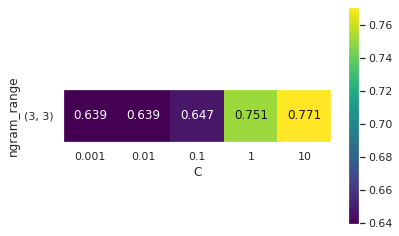

In [0]:
scores = grid.cv_results_['mean_test_score'].reshape(-1,1).T

heatmap=mglearn.tools.heatmap(
    scores,xlabel="C",ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

In [0]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_

In [0]:
predictions_lr = grid.predict(test['summary_text_pp_lc_nm_2'])
#mglearn.tools.visualize_coefficients(
#    coef,feature_names, n_top_features=40)

In [0]:
print(classification_report(predictions_lr,test_labels['Score']))

              precision    recall  f1-score   support

           1       0.60      0.74      0.67     10564
           2       0.44      0.68      0.53      4793
           3       0.47      0.67      0.56      7486
           4       0.50      0.63      0.56     16064
           5       0.94      0.82      0.88    103207

    accuracy                           0.78    142114
   macro avg       0.59      0.71      0.64    142114
weighted avg       0.82      0.78      0.80    142114



In [0]:
pipeline = Pipeline([
    ('bow', TfidfVectorizer(min_df=5,ngram_range=(1,3))),  # strings to token integer counts
    ('logisticregression',LogisticRegression(max_iter=1000,C=10)) # train on TF-IDF vectors w/ Logistic Regression
])

pipeline.fit(train['summary_text_pp_lc_nm_2'],train['Score'])

predictions = pipeline.predict(test['summary_text_pp_lc_nm_2'])

print(classification_report(predictions,test_labels['Score']))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           1       0.82      0.80      0.81     13438
           2       0.53      0.68      0.59      5754
           3       0.60      0.70      0.64      9075
           4       0.57      0.72      0.63     16183
           5       0.96      0.89      0.92     97664

    accuracy                           0.84    142114
   macro avg       0.70      0.76      0.72    142114
weighted avg       0.86      0.84      0.85    142114



In [0]:
#scores = cross_val_score(LogisticRegression(max_iter=300),X_train_cv, y_train, cv=5)
#print("Mean cross validation accuracy:{:.2f}".format(np.mean(scores)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Mean cross validation accuracy:0.78


In [0]:
#running logistic regression with C paramter
#hyper parameter is C

#to run on COLAB
#param_grid = {'C': [0.001,0.01,0.1,1,10]}
#grid = GridSearchCV(LogisticRegression(max_iter=300),param_grid, cv=5)
#grid.fit(X_train_cv3,y_train)
#print("Best cross-validation score: {:.2f}".format(grid.best_score_))
#print("Best parameters:", grid.best_params_)

#Best cross-validation score: 0.78
#Best parameters: {'C': 10}

#with tfidf ngram (1,3) min 1% and max 50%
#Best cross-validation score: 0.72
#Best parameters: {'C': 10}



# Mulitnomial NB Model Building

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/nai

Best cv score:0.81
Best parameters:
{'multinomialnb__alpha': 0.01, 'tfidfvectorizer__ngram_range': (1, 3)}

-Top 20 -
    Word  Coefficient
     not    -5.690524
   taste    -6.117361
 product    -6.176728
    like    -6.312545
     bad    -6.473616
     one    -6.629799
   would    -6.638601
     get    -6.644151
      no    -6.652594
  coffee    -6.661374
   order    -6.670707
    food    -6.712329
     dog    -6.753930
  flavor    -6.773398
     try    -6.781475
     buy    -6.781675
    make    -6.793620
     box    -6.833659
    even    -6.871757
   money    -6.902185

-Top 20 -
                     Word  Coefficient
             zukes peanut   -17.267542
      zukes peanut butter   -17.267542
              zukes pound   -17.267542
          zukes pound get   -17.267542
          zukes president   -17.267542
   zukes president please   -17.267542
            zukes product   -17.267542
               zukes seem   -17.267542
                     zulu   -17.267542
              zulu 

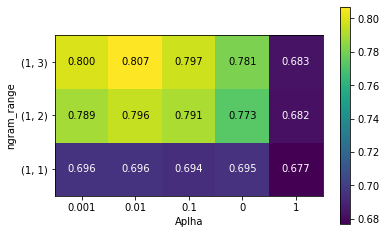

In [0]:
#hyperparameter considered aplha 
#aplha (default=1) --> Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
pipe= make_pipeline(TfidfVectorizer(min_df=5),MultinomialNB())
param_grid = {'multinomialnb__alpha':[0.001,0.01,0.1,0,1],
             'tfidfvectorizer__ngram_range':[(1,1),(1,2),(1,3)]}
grid = GridSearchCV(pipe,param_grid,cv=5)
grid.fit(train['summary_text_pp_lc_nm_2'],train['Score'])
print("Best cv score:{:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score'].reshape(-1,3).T

heatmap=mglearn.tools.heatmap(
    scores,xlabel="Aplha",ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['multinomialnb__alpha'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['multinomialnb'].coef_.tolist()[0]
coeff_df = pd.DataFrame({'Word' : feature_names, 'Coefficient': coef})
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0,1])
print('')
print('-Top 20 -')
print(coeff_df.head(20).to_string(index=False))
print('')
print('-Top 20 -')        
print(coeff_df.tail(20).to_string(index=False))
#Best cv score:0.81
#Best parameters:
#{'multinomialnb__alpha': 0.01, 'tfidfvectorizer__ngram_range': (1, 3)}

In [0]:
Model1 = MultinomialNB().fit(X_train_tfidf_2, train['Score'])

In [0]:
print('predicted:',Model1.predict(X_train_tfidf_2)[0])
print('expected:',train.Score[3])

predicted: 5
expected: 5


In [0]:
rev_train, rev_test, label_train, label_test =\
train_test_split(train['summary_text_pp_lc_nm_2'],train['Score'], test_size=0.3,random_state=101)

print(len(rev_train), len(rev_test), len(rev_train) + len(rev_test))

298438 127902 426340


In [0]:
#pipeline created to test the model as per the optimal hyperparameter extracted from the above training

pipeline = Pipeline([
    ('bow', CountVectorizer(min_df=5,ngram_range=(1,3))),  # strings to token integer counts
    ('classifier', MultinomialNB(alpha=0.01)),  # train on TF-IDF vectors w/ Naive Bayes classifier
    #('SGDclassifier',SGDClassifier(loss='perceptron')) # train on TF-IDF vectors w/ SGD classifier
])

In [0]:
pipeline.fit(train['summary_text_pp_lc_nm_2'],train['Score'])

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=5,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
predictions = pipeline.predict(test['summary_text_pp_lc_nm_2'])

In [0]:
print(classification_report(predictions,test_labels['Score']))

              precision    recall  f1-score   support

           1       0.71      0.81      0.75     11485
           2       0.49      0.64      0.56      5728
           3       0.52      0.65      0.58      8502
           4       0.54      0.61      0.57     18003
           5       0.94      0.87      0.90     98396

    accuracy                           0.81    142114
   macro avg       0.64      0.71      0.67    142114
weighted avg       0.83      0.81      0.82    142114



# SGD Classifier Model

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

Best cv score:0.82
Best parameters:
{'sgdclassifier__loss': 'perceptron', 'tfidfvectorizer__ngram_range': (1, 3)}

-Top 20 -
          Word  Coefficient
      terrible     0.011831
      horrible     0.010419
         awful     0.010260
       disgust     0.010201
      one star     0.010158
       no good     0.008842
           bad     0.008520
     dangerous     0.008506
     zero star     0.008222
      pathetic     0.007931
      not good     0.007760
          yuck     0.007688
           rip     0.007601
 negative star     0.007414
     stop work     0.007359
         nasty     0.007339
         gross     0.007334
       useless     0.006987
         threw     0.006847
         bogus     0.006683

-Top 20 -
                Word  Coefficient
           wonderful    -0.006856
                 yum    -0.007131
                 fun    -0.007260
            downside    -0.007527
               yummy    -0.007534
               amaze    -0.007896
        not terrible    -0.007921
    

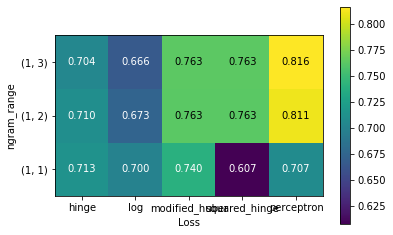

In [0]:
#hyperparameter considered loss 
#loss (Default --> ‘hinge’, which gives a linear SVM) --> The possible options are ‘hinge’, ‘log’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’
pipe= make_pipeline(TfidfVectorizer(min_df=5),SGDClassifier())
param_grid = {'sgdclassifier__loss':['hinge','log','modified_huber','squared_hinge','perceptron'],
             'tfidfvectorizer__ngram_range':[(1,1),(1,2),(1,3)]}
grid = GridSearchCV(pipe,param_grid,cv=5)
grid.fit(train['summary_text_pp_lc_nm_2'],train['Score'])
print("Best cv score:{:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

#Best cv score:0.82
#Best parameters:
#{'sgdclassifier__loss': 'perceptron', 'tfidfvectorizer__ngram_range': (1, 3)}

scores = grid.cv_results_['mean_test_score'].reshape(-1,3).T

heatmap=mglearn.tools.heatmap(
    scores,xlabel="Loss",ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['sgdclassifier__loss'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['sgdclassifier'].coef_.tolist()[0]
coeff_df = pd.DataFrame({'Word' : feature_names, 'Coefficient': coef})
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0,1])
print('')
print('-Top 20 -')
print(coeff_df.head(20).to_string(index=False))
print('')
print('-Top 20 -')        
print(coeff_df.tail(20).to_string(index=False))

In [0]:
Model2 = SGDClassifier().fit(X_train_tfidf_1, train['Score'])

In [0]:
print('predicted:',Model2.predict(X_train_tfidf_1)[0])
print('expected:',train.Score[3])

predicted: 5
expected: 5


In [0]:
#pipeline created to test the model as per the optimal hyperparameter extracted from the above training
pipeline = Pipeline([
    ('bow', TfidfVectorizer(min_df=5,ngram_range=(1,3))),  # strings to token integer counts
    ('SGDclassifier',SGDClassifier(loss='perceptron')) # train on TF-IDF vectors w/ SGD classifier
])

pipeline.fit(train['summary_text_pp_lc_nm_2'],train['Score'])

predictions = pipeline.predict(test['summary_text_pp_lc_nm_2'])

print(classification_report(predictions,test_labels['Score']))

              precision    recall  f1-score   support

           1       0.79      0.78      0.79     13214
           2       0.50      0.64      0.57      5821
           3       0.57      0.65      0.61      9379
           4       0.57      0.65      0.61     18011
           5       0.94      0.89      0.92     95689

    accuracy                           0.82    142114
   macro avg       0.68      0.72      0.70    142114
weighted avg       0.84      0.82      0.83    142114



# TOPIC MODELLING OF HIGH AND LOW RATINGS

In [0]:
#seperating 5 star and 1 star review

train_5star = train[train['Score']==5]
train_1star = train[train['Score']==1]

In [0]:
train_5star.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,review_len,word_count,numerics,count_of_stopwords
count,272492.000000,272492.000000,272492.000000,272492.0,2.724920e+05,272492.000000,272492.000000,272492.000000,272492.000000
mean,285890.169021,1.654540,1.854763,5.0,1.294262e+09,425.316017,77.955202,0.390481,29.450197
std,163781.498091,7.151739,7.488061,0.0,4.921788e+07,413.078941,73.738690,0.990275,28.750421
min,1.000000,0.000000,0.000000,5.0,9.408096e+08,23.000000,4.000000,0.000000,0.000000
25%,144535.500000,0.000000,0.000000,5.0,1.267142e+09,190.000000,35.000000,0.000000,12.000000
50%,287247.500000,0.000000,0.000000,5.0,1.309046e+09,300.000000,55.000000,0.000000,21.000000
75%,427344.500000,2.000000,2.000000,5.0,1.332029e+09,507.000000,94.000000,0.000000,36.000000
max,568454.000000,808.000000,815.000000,5.0,1.351210e+09,16991.000000,2526.000000,32.000000,828.000000


In [0]:
train_1star.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,review_len,word_count,numerics,count_of_stopwords
count,39193.000000,39193.000000,39193.000000,39193.0,3.919300e+04,39193.000000,39193.000000,39193.000000,39193.000000
mean,282904.535606,2.747812,4.903171,1.0,1.303158e+09,501.748067,91.314291,0.541882,34.586814
std,162865.104452,8.685466,10.700600,0.0,4.333798e+07,516.598898,92.424955,1.151885,37.059333
min,2.000000,0.000000,0.000000,1.0,9.482400e+08,25.000000,6.000000,0.000000,0.000000
25%,142706.000000,0.000000,1.000000,1.0,1.286237e+09,224.000000,41.000000,0.000000,14.000000
50%,283604.000000,1.000000,2.000000,1.0,1.316909e+09,363.000000,67.000000,0.000000,25.000000
75%,421880.000000,3.000000,6.000000,1.0,1.334275e+09,592.000000,109.000000,1.000000,42.000000
max,568434.000000,446.000000,486.000000,1.0,1.351210e+09,10345.000000,1752.000000,24.000000,668.000000


In [0]:
#reducing the dataset to 100000 review of 5stars 

np.random.seed(10)
remove_n = 172492
drop = np.random.choice(train_5star.index, remove_n, replace=False)
train_5star_r = train_5star.drop(drop)

In [0]:
train_5star_r.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,review_len,word_count,numerics,count_of_stopwords
count,100000.000000,100000.000000,100000.000000,100000.0,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,285424.478670,1.658280,1.859730,5.0,1.294175e+09,425.651050,78.035660,0.392490,29.464010
std,163815.450405,7.114582,7.481994,0.0,4.924435e+07,413.024638,73.752744,0.998525,28.713352
min,10.000000,0.000000,0.000000,5.0,9.440928e+08,58.000000,9.000000,0.000000,0.000000
25%,144130.000000,0.000000,0.000000,5.0,1.266797e+09,190.000000,35.000000,0.000000,12.000000
50%,287010.500000,0.000000,0.000000,5.0,1.309046e+09,301.000000,56.000000,0.000000,21.000000
75%,426309.500000,2.000000,2.000000,5.0,1.332029e+09,507.000000,94.000000,0.000000,36.000000
max,568454.000000,559.000000,562.000000,5.0,1.351210e+09,10835.000000,1873.000000,32.000000,779.000000


In [0]:
train_5star_r.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'summary_text', 'datetime', 'review_len', 'word_count',
       'summary_text_pp', 'summary_text_pp_lc', 'numerics',
       'count_of_stopwords', 'summary_text_pp_lc_nm',
       'summary_text_pp_lc_nm_1', 'summary_text_pp_lc_nm_2',
       'summary_text_pp_lc_nm_3'],
      dtype='object')

In [0]:
vect_tm = CountVectorizer(max_features=10000,max_df=.15)
X_tm_5 = vect_tm.fit_transform(train_5star_r['summary_text_pp_lc_nm_2'])

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=20, learning_method="batch",
                                max_iter=25, random_state=0)
# We build the model and transform the data in one step
# Computing transform takes some time,
# and we can save time by doing both at once
Fivestar_topics = lda.fit_transform(X_tm_5)

In [0]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (20, 10000)


In [0]:
# for each topic (a row in the components_), sort the features (ascending).
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# get the feature names from the vectorizer:
feature_names_tm = np.array(vect_tm.get_feature_names())

In [0]:
mglearn.tools.print_topics(topics=range(20), feature_names=feature_names_tm,
                           sorting=sorting, topics_per_chunk=10, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      --------      --------      --------      --------      --------      
chip          sauce         snack         low           ingredient    mix           treat         bread         coffee        tea           
cooky         add           bar           calorie       organic       milk          dog           year          cup           green         
free          hot           eat           fat           natural       add           chew          syrup         popcorn       bag           
gluten        soup          cereal        protein       no            vanilla       small         ever          pod           drink         
salt          rice          healthy       sugar         health        powder        give          family        machine       cup           
bag          

In [0]:
vect_tm_1 = CountVectorizer(max_features=10000,max_df=.15)
X_tm_1 = vect_tm_1.fit_transform(train_1star['summary_text_pp_lc_nm_2'])

In [0]:
lda_1 = LatentDirichletAllocation(n_components=20, learning_method="batch",
                                max_iter=25, random_state=0)
# We build the model and transform the data in one step
# Computing transform takes some time,
# and we can save time by doing both at once
Onestar_topics = lda_1.fit_transform(X_tm_1)

In [0]:
print("lda.components_.shape: {}".format(lda_1.components_.shape))

lda.components_.shape: (20, 10000)


In [0]:
# for each topic (a row in the components_), sort the features (ascending).
# Invert rows with [:, ::-1] to make sorting descending
sorting_1 = np.argsort(lda_1.components_, axis=1)[:, ::-1]
# get the feature names from the vectorizer:
feature_names_tm1 = np.array(vect_tm_1.get_feature_names())

In [0]:
mglearn.tools.print_topics(topics=range(20), feature_names=feature_names_tm1,
                           sorting=sorting_1, topics_per_chunk=10, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      --------      --------      --------      --------      --------      
chocolate     work          sugar         box           coffee        price         food          food          eat           chip          
candy         hair          ingredient    bag           cup           store         eat           change        bar           cooky         
popcorn       cake          free          open          roast         pack          day           new           review        can           
look          bread         syrup         package       pod           oz            cat           old           give          stale         
gift          plant         artificial    packaging     weak          cost          thing         year          really        rancid        
disappointed 